# Sentence Transformers

https://www.sbert.net: You can use this framework to compute sentence / text embeddings for more than 100 languages. These embeddings can then be compared e.g. with **cosine-similarity** to find sentences with a similar meaning. This can be useful for **semantic textual similarity**, **semantic search**, or **paraphrase mining**.

### Paraphrase Mining 
Here's how paraphrase mining could enhance your exploration of theme extraction and trend analysis in the context of GP surgery reviews:

1. **Enhanced Theme Extraction**: By using paraphrase mining, you can group together reviews that essentially say the same thing but in different words. For example, "The receptionist was very welcoming" and "Great service at the front desk" could be identified as expressing a similar sentiment about staff behavior. This can help you consolidate feedback more accurately, ensuring that your thematic analysis captures the true frequency and nature of the comments on specific aspects like wait times, staff attitudes, or cleanliness.
2. **Refined Trend Analysis**: Paraphrase mining can also improve trend analysis. When you track changes over time, it's crucial to recognize when different phrases are expressing similar sentiments. This ensures that your analysis accounts for all relevant data points, providing a more accurate and nuanced understanding of how patient perceptions evolve. For instance, changes in sentiment about a new online booking system might be expressed in various ways across reviews. Paraphrase mining helps you aggregate these diverse expressions to assess the overall trend more accurately.

**To delve deeper into these topics:**

1. **Experiment with Tools**: There are various NLP libraries and tools that support sentence transformers and paraphrase mining, such as Hugging Face's Transformers library. You could experiment with these tools using actual review data to get hands-on experience.
2. **Case Studies**: Look for case studies or research papers where sentence transformers and paraphrase mining have been applied to similar types of text analysis. This can provide insights into methodologies and outcomes that might inform your approach.
3. **Project Implementation**: Consider a pilot project where you apply these techniques to a subset of your review data. Start with theme extraction to identify major themes and then perform trend analysis to see how perceptions in these themes change over time. This project could serve as a practical learning experience and a proof of concept for wider application in your practice.


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sketch

%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')
data.head(2)

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,sentiment,sentiment_score,feedback_labels,improvement_labels
0,2023-07-13 15:28:00,Extremely likely,"Very friendly caring staff, treated me with re...",NaN,Earls Court Surgery,13.0,3,5.0,positive,0.926162,Overall Patient Satisfaction,NaN
1,2023-07-13 15:29:00,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4.0,0,5.0,positive,0.963593,Patient Privacy and Confidentiality,NaN


In [18]:
raw_reviews = data['free_text'].dropna().to_list()

In [24]:
raw_reviews = set(raw_reviews)

In [26]:
raw_reviews = set(raw_reviews)

In [27]:
len(raw_reviews)

1907

In [28]:
# Prefixing each review with "Review X:"
labeled_reviews = [f"Review {i + 1}: {review}" for i, review in enumerate(raw_reviews)]

In [29]:
labeled_reviews

['Review 1: Friendly surgery and welcoming staff, I have no complaints.',
 'Review 2: They are very efficient and pleasant although overworked. ',
 "Review 3: Staff have been brilliant so far, I've only been dealing with this clinic for a brief period.  It's been an easy process dealing with folk.  ",
 'Review 4: The triage phone back system does not work at all well for people with jobs. ',
 'Review 5: I’ve been a patient for 30 years and I’m very satisfied always have the service I received. Thank you',
 'Review 6: Staff and doctors are very nice ',
 'Review 7: No Complains so far hope that all Continues as is now Kind Regards',
 'Review 8: I feel totally let down by the surgery, in failing to source a Covid vaccination for me, so I could have it other than in my arms, where I have lymphoedema risk. ',
 'Review 9: I have never used the website so don’t know what it’s like, but there’s no option for that in your survey. ',
 'Review 10: Very  helpful practice',
 'Review 11: Availabilit

https://www.sbert.net/docs/quickstart.html#comparing-sentence-similarities

## Sentence Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# Our sentences we like to encode
sentences = sent_list
# Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

## Comparing Sentence Similarities
The sentences (texts) are mapped such that sentences with similar meanings are close in vector space. One common method to measure the similarity in vector space is to use cosine similarity. For two sentences, this can be done like this: Cosine Simularity - https://en.wikipedia.org/wiki/Cosine_similarity

In [6]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")

sentences = sent_list

# Encode all sentences
embeddings = model.encode(sentences)

# Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)

# Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim) - 1):
    for j in range(i + 1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

# Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

In [7]:
print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:200]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

Top-5 most similar pairs:
They are very helpful 	 They are very helpful 	 1.0000
Very helpful practice 	 Very  helpful practice 	 1.0000
Always easy to get appointments 	 Always easy to get appointments  	 1.0000
Continue the good job  	 Continue the good job 	 1.0000
Extremely likely service 	 Extremely likely service  	 1.0000
Efficient excellent service 	 Efficient excellent service  	 1.0000
All good and positive. 	 All good and positive. 	 1.0000
They are very helpful 	 They are very helpful 	 1.0000
They are very helpful 	 They are very helpful 	 1.0000
They are very helpful 	 They are very helpful 	 1.0000
They are very helpful 	 They are very helpful 	 1.0000
They are very helpful 	 They are very helpful 	 1.0000
Very helpful staff 	 Very Helpful staff 	 1.0000
Very helpful staff 	 Very Helpful staff  	 1.0000
On my recent visit there were no doctors at work, only nurses and support staff.  	 On my recent visit there were no doctors at work, only nurses and support staff. 	 1.0

In [8]:
all_sentence_combinations

[[tensor(1.0000), 880, 881],
 [tensor(1.0000), 1187, 1189],
 [tensor(1.0000), 862, 863],
 [tensor(1.0000), 910, 911],
 [tensor(1.0000), 360, 1872],
 [tensor(1.0000), 514, 656],
 [tensor(1.0000), 754, 755],
 [tensor(1.0000), 878, 879],
 [tensor(1.0000), 878, 880],
 [tensor(1.0000), 878, 881],
 [tensor(1.0000), 879, 880],
 [tensor(1.0000), 879, 881],
 [tensor(1.0000), 893, 1047],
 [tensor(1.0000), 893, 1048],
 [tensor(1.0000), 980, 981],
 [tensor(1.0000), 992, 993],
 [tensor(1.0000), 1047, 1048],
 [tensor(1.0000), 7, 28],
 [tensor(1.0000), 31, 32],
 [tensor(1.0000), 757, 758],
 [tensor(1.0000), 1146, 1147],
 [tensor(1.0000), 135, 136],
 [tensor(1.0000), 135, 858],
 [tensor(1.0000), 135, 859],
 [tensor(1.0000), 136, 858],
 [tensor(1.0000), 136, 859],
 [tensor(1.0000), 256, 259],
 [tensor(1.0000), 415, 456],
 [tensor(1.0000), 415, 1864],
 [tensor(1.0000), 456, 1864],
 [tensor(1.0000), 723, 724],
 [tensor(1.0000), 740, 741],
 [tensor(1.0000), 752, 753],
 [tensor(1.0000), 858, 859],
 [tensor

## Fast Clustering

In [13]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

In [42]:
# Load the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Let's assume your 1900 GP surgery reviews are in a list called 'reviews'
# reviews = ["Review 1 text", "Review 2 text", ..., "Review 1900 text"]

# Generate embeddings for all reviews
embeddings = model.encode(labeled_reviews, show_progress_bar=True)

# Use KMeans clustering
# You can choose the number of clusters based on your own criteria
# For example, let's set it to 50 for this demonstration
num_clusters = 20
clustering_model = KMeans(n_clusters=num_clusters, random_state=0)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

# Analyze the clusters
# Here's a simple way to see which reviews fall into each cluster
clustered_reviews = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_reviews[cluster_id].append(reviews[sentence_id])

# Now clustered_reviews is a list of num_clusters lists, each containing the reviews assigned to that cluster

Batches:   0%|          | 0/60 [00:00<?, ?it/s]

/Users/janduplessis/.pyenv/versions/3.10.6/envs/friends2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
# Example: Print the first 5 reviews of the first cluster
print("First cluster reviews:")
for review in clustered_reviews[0][:10]:
    print("\t", review)

First cluster reviews:
	 Dr [PERSON] was extremely nice 
	 The nurse Miss [PERSON] was absolutely amazing, understanding, kind, fun, thorough, careful! She is the best!
	 I’m with Earl's Court Surgery about 20 years. I’m very happy. They do excellent service 
	 I have been going to EC for almost 20years and have always received hood care. Staff are helpful and competent and offer a wide range of support 
	 Good Doctors specially [PERSON]
	 Because I'm very happy to the service 
	 I have made this clear to other members of staff. I feel Dr [PERSON] let me down and in fact was responsible for a gross dereliction of duty. She was very slow to respond to my symptoms and in retrospect did not think she believed me. She was irresponsible and failed in showing a duty of care towards me.
	 All services available at one place
	 it’s just ok to crap to pure  shit 
	 Helpful, friendly good service. I feel I have a personal relationship with the Surgery and my GP and I appreciate text invitations,

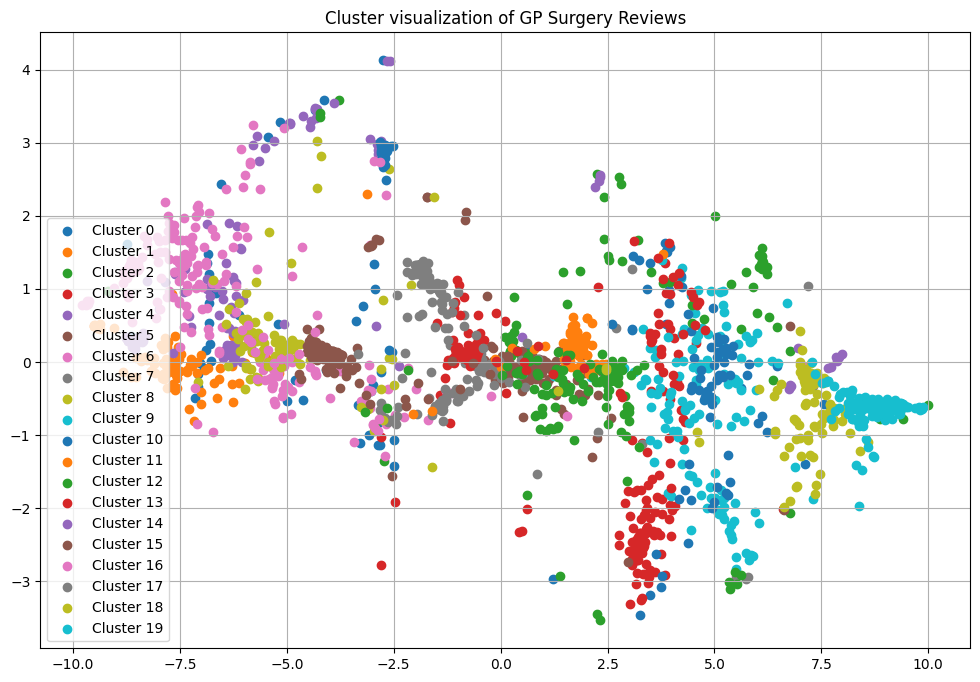

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assume 'embeddings' is your list of sentence embeddings and 'cluster_assignment' is the array of cluster labels from KMeans

# Reduce dimensions to 2D for visualization, using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plotting
plt.figure(figsize=(12, 8))
for i in range(num_clusters):
    indices = [j for j, x in enumerate(cluster_assignment) if x == i]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f'Cluster {i}')

plt.title('Cluster visualization of GP Surgery Reviews')
plt.legend()
plt.grid(True)
plt.show()